In [1]:
import numpy as np
import matplotlib.pyplot as plt

length of data=1000


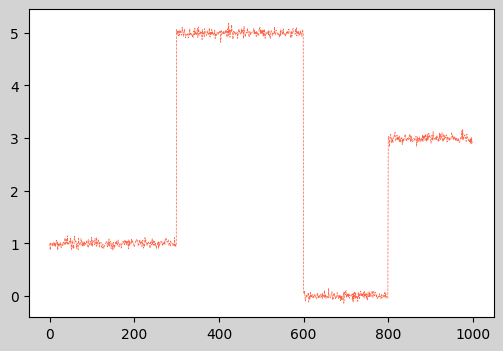

In [2]:
f = np.genfromtxt('noisy_signal.csv', delimiter=',')
f = f.reshape((-1,1))
n = len(f)
print(f"length of data={n}")
plt.figure(figsize=(6,4), facecolor='lightgray')
plt.plot(f, linestyle='--', color='tomato', lw=0.5)
plt.show()

In [3]:
I = np.eye(n-1)
zcol = np.zeros((n-1,1))
I1 = np.hstack ([I, zcol])
I2 = np.hstack([zcol, -I])
L = (I1 + I2)*999
print(f"shape of L = {L.shape}")
print(L)

shape of L = (999, 1000)
[[ 999. -999.    0. ...    0.    0.    0.]
 [   0.  999. -999. ...    0.    0.    0.]
 [   0.    0.  999. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -999.    0.    0.]
 [   0.    0.    0. ...  999. -999.    0.]
 [   0.    0.    0. ...    0.  999. -999.]]


In [4]:
w_vals = [10**(-4), 5*10**(-4), 10**(-3)]
x_vals = []
for w in w_vals:
    x = np.linalg.inv(np.eye(n) + w*L.T@L)@f
    x_vals.append(x)

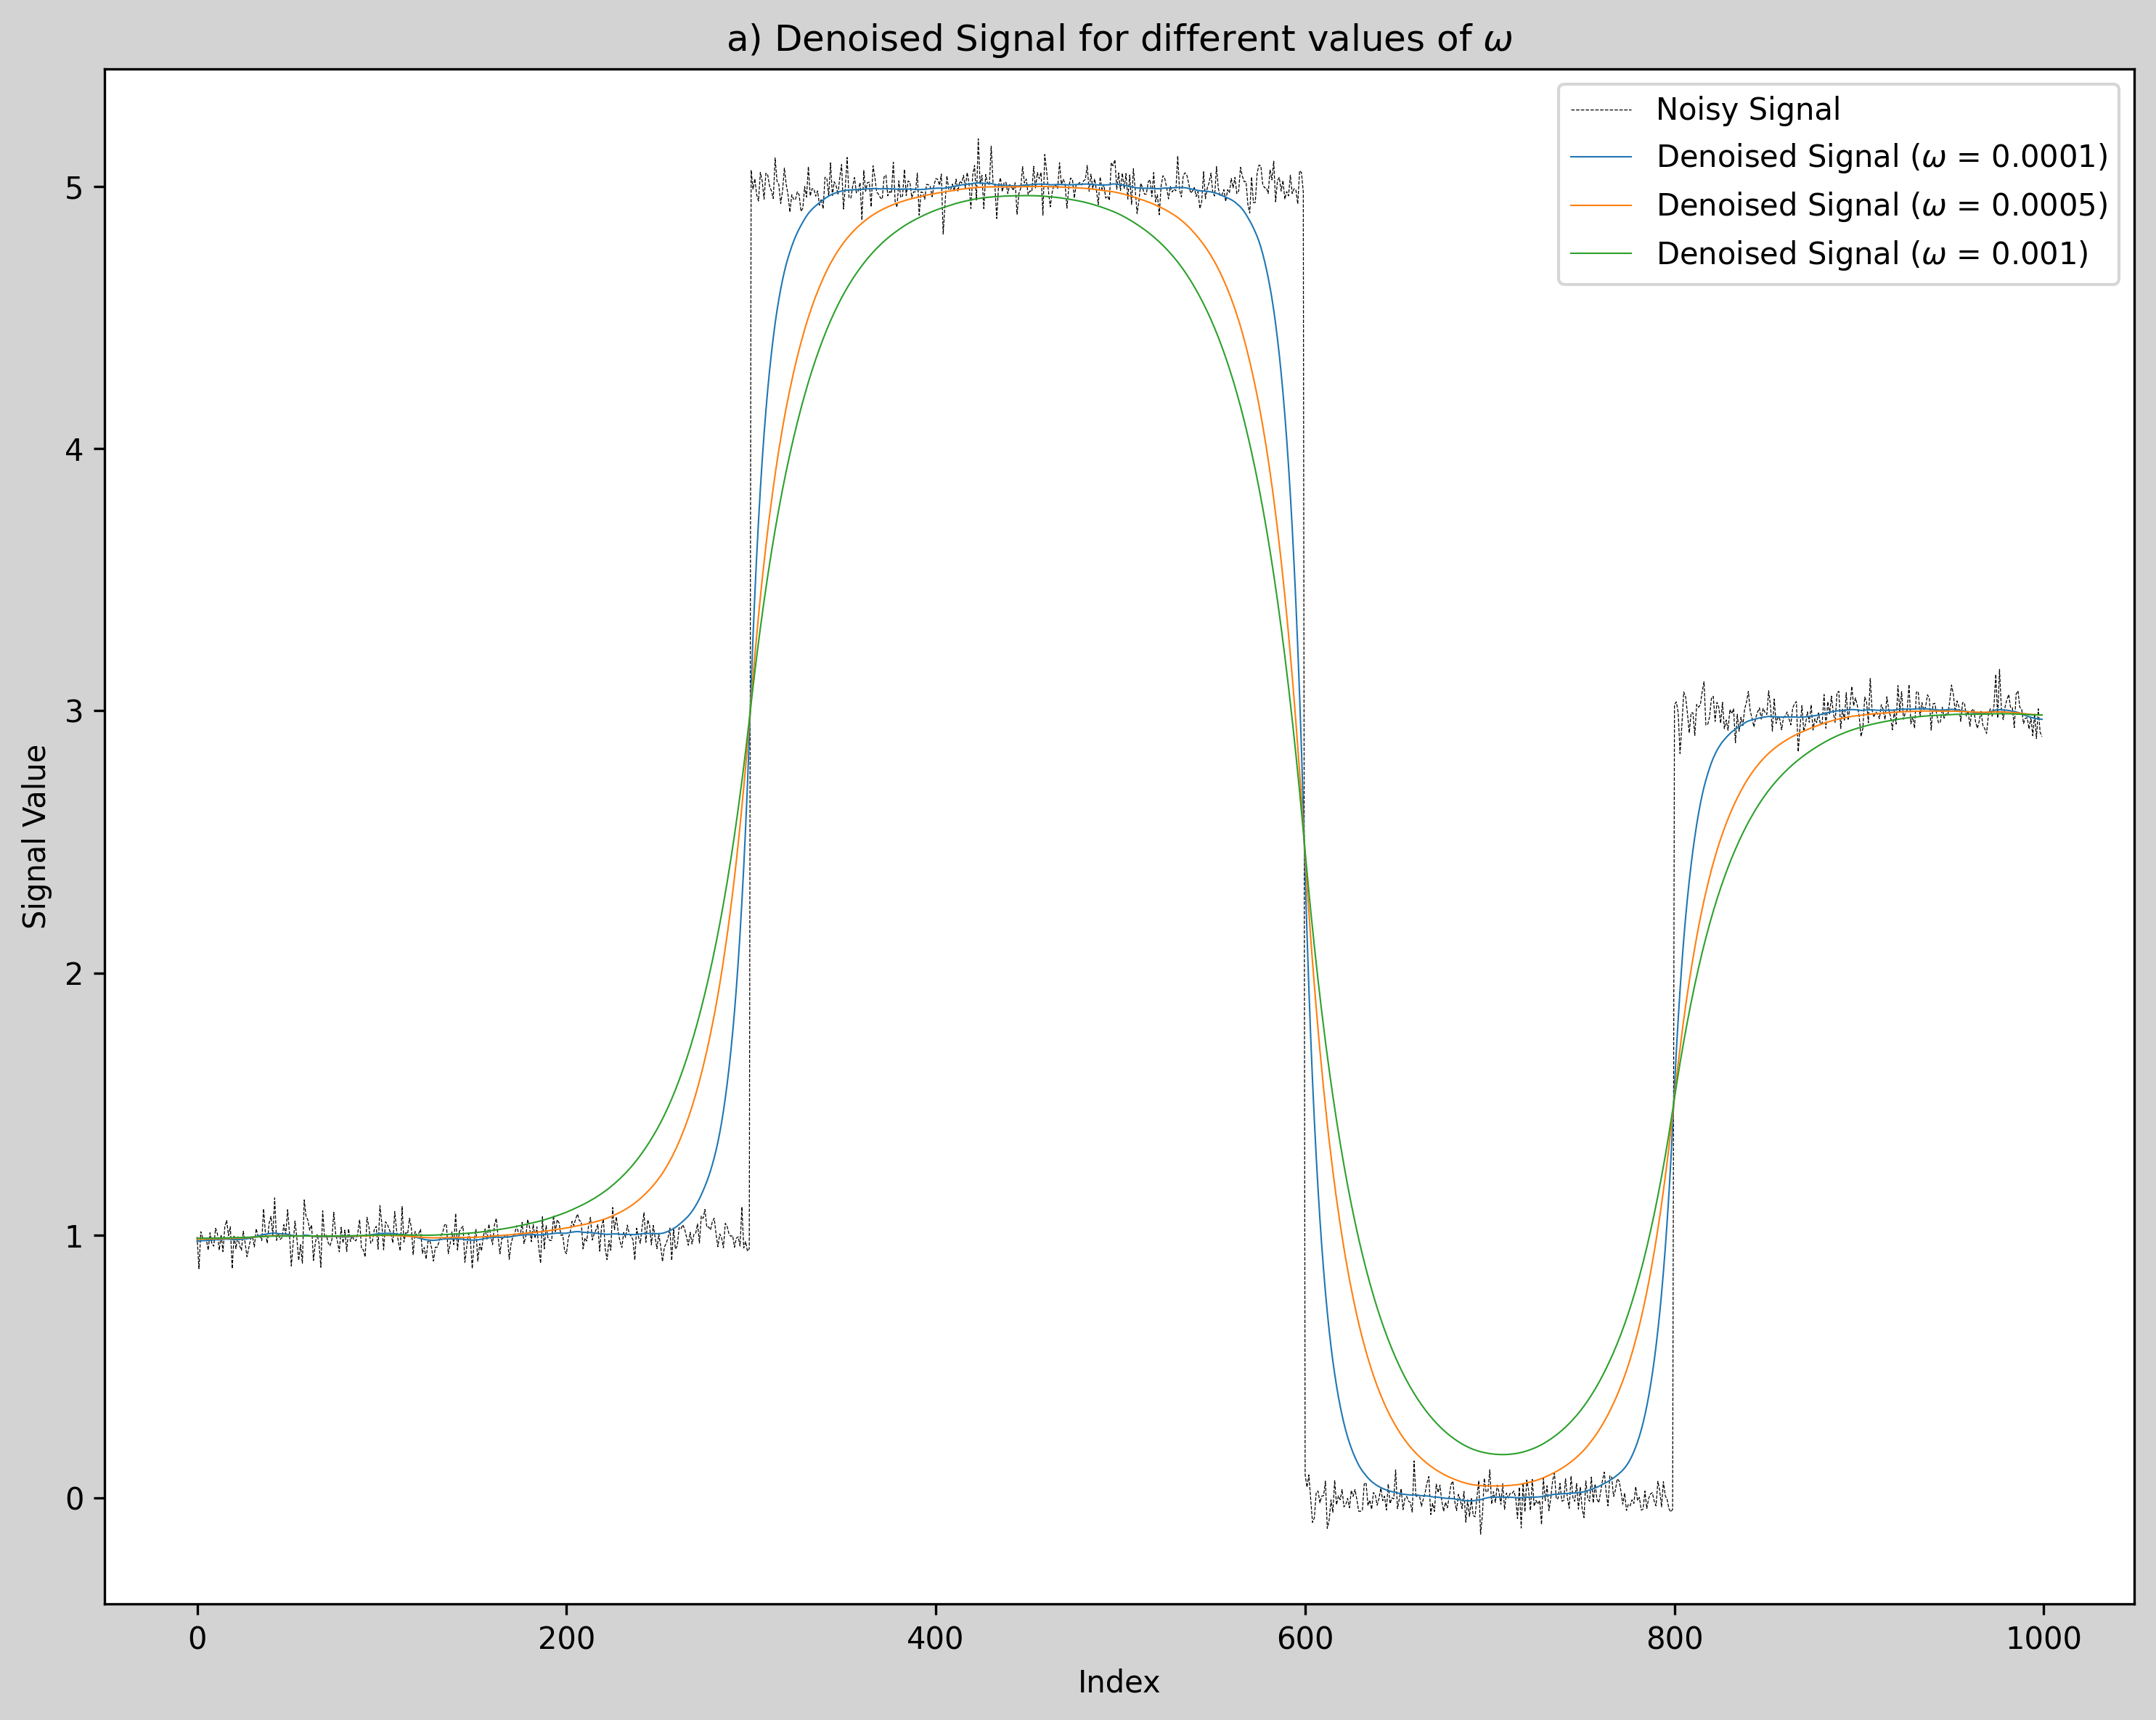

In [7]:
plt.figure(figsize=(10,8), facecolor='lightgray', dpi=300)
plt.title("a) Denoised Signal for different values of $\omega$")
plt.plot(f[:], color='k', label='Noisy Signal', linestyle='--', lw=0.3)
for w, x in zip(w_vals, x_vals):
    l = str(w)
    plt.plot(x[:], label=f"Denoised Signal ($\omega$ = {l})", lw=0.5)
plt.legend()
plt.ylabel("Signal Value")
plt.xlabel("Index")
plt.tight_layout()
plt.savefig("a.png")
plt.show()